## Paso 1. Abrimos el archivo de datos y estudiamos la información general 

### 1.1 Cargamos librerias

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1.2 Leemos dataframe

Leemos el dataframe y lo asignamos a la variable **games**

In [2]:
games=pd.read_csv('games.csv')
games_modified=pd.read_csv('games.csv')

### 1.3 Visualizamos dataframe
Haciendo uso del método **info()**, del método **head()** y , el método **describe()**

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Paso 2. Preparamos los datos
### 2.1 Cambiamos a minusculas los encabezados
Para normalizar nombres de columnas.

In [6]:
games_modified.columns = games_modified.columns.str.lower()

### 2.2 Cambiamos a minusculas los datos tipo object
Para posteriormente detectar si hay filas completamente duplicadas.

In [7]:
games_modified['name']=games_modified['name'].str.lower()
games_modified['platform']=games_modified['platform'].str.lower()
games_modified['genre']=games_modified['genre'].str.lower()

### 2.3 Verificamos existencia de renglones completamente duplicados en el dataframe
Para limpiar nuestros datos y no afecten en nuestro estudio

In [8]:
print(len(games_modified[games_modified.duplicated()]))

0


### 2.4 Trabajamos con los valores ausentes en las columnas **Name** y **Genre**
primeramente visualizamos los valores ausentes

In [9]:
display(games_modified[games_modified['name'].isna()==True])
display(games_modified[games_modified['genre'].isna()==True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Vemos que coinciden los nulos de Name y Genre, cuyo número (2 elementos) no es significativo para el total de elementos, además que cuentan con más valores nulos,  por lo que se eliminan.

In [10]:
games_modified.dropna(subset=['name'],inplace=True)

### 2.5 Trabajamos con los valores ausentes en las columnas **critic_score** y **user_score**
 Critic_score y User_Score  los conservamos como los tenemos, son demasiados valores nulos, si los sustituimos por la media o la mediana generaremos un cesgo.

### 2.6 Cambiamos el tipo de variable de  **year_of_release**
 Decidimos eliminar las filas donde falta el año de lanzamiento. Para nuestro objetivo de analizar datos hasta 2016 para predecir 2017, es crucial saber el año de lanzamiento de los juegos.

In [11]:

games_modified.dropna(subset=['year_of_release'], inplace=True)
games_modified['year_of_release']=pd.to_numeric(games_modified['year_of_release'], errors='coerce').astype('Int64')
games_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


### 2.7 Creamos la columna **total_sales** 
 Obtenemos el cálculo de la columna total sales sumando las ventas en Europa(**eu_sales**), las ventas en Norte América(**na_sales**), las ventas en Japón(**jp_sales**) y las ventas en otros lados (**other_sales**) de cada renglón y guardandola en **total_sales**.

In [12]:
games_modified['total_sales']=games_modified['jp_sales']+games_modified['na_sales']+games_modified['eu_sales']+games_modified['other_sales']

### 2.8 Manejo del valor *tbd* en **user_score**
 Reemplazamos *tbd* en **user_score** y convertimps a numérico

In [13]:
# Reemplazar 'tbd' en user_score y convertir a numérico
games_modified['user_score'] = games_modified['user_score'].replace('tbd', np.nan)
games_modified['user_score'] = games_modified['user_score'].astype(float)

### 2.9 Tratar los valores ausentes en 'rating'
 Completando los valores faltantes con una categoría como 'unknown' 

In [14]:
games_modified['rating'].fillna('unknown', inplace=True)

C:\Users\secap\AppData\Local\Temp\ipykernel_5836\3939882975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_modified['rating'].fillna('unknown', inplace=True)


### 2.10 Visualización del dataframe preparado
 Una vez tenemos nuestro dataframe preparado, lo verificamos para proceder a la etapa de análisis.

In [15]:
games_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [16]:

display(games_modified.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10448,pro yakyuu famista ds 2009,ds,2009,sports,0.00,0.00,0.10,0.00,NaN,NaN,unknown,0.10
13427,rapala fishing frenzy 2009,x360,2008,sports,0.04,0.00,0.00,0.00,41.0,7.2,E,0.04
1397,true crime: streets of la,xb,2003,action,0.96,0.37,0.00,0.05,77.0,7.8,M,1.38
4560,the x files,ps,1999,adventure,0.24,0.16,0.00,0.03,NaN,NaN,unknown,0.43
1878,beatmania,ps,1998,simulation,0.00,0.00,1.07,0.02,NaN,NaN,unknown,1.09


# Paso 3. Analisis de los datos
### 3.1 Año de lanzamiento de juegos vendidos en 2016
Revisamos cuantos juegos fueron lanzados por año.

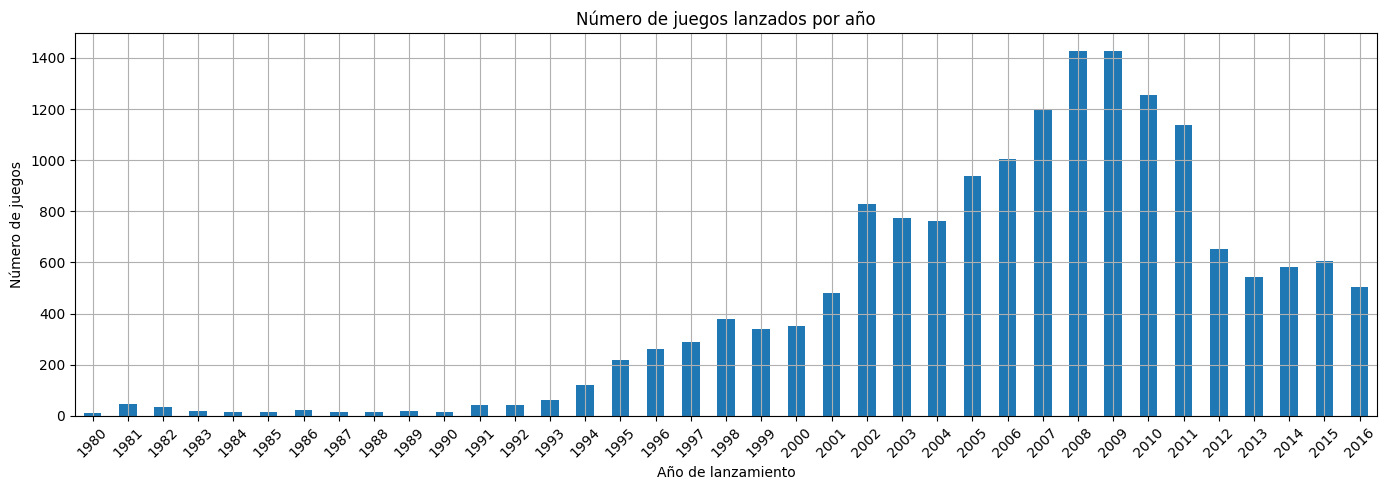

In [17]:
games_modified['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(14, 5))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica del número de juegos lanzados por año revela una tendencia: Inicialmente, durante la década de 1980 y principios de la de 1990, el número de lanzamientos fue bajo. Se observa un crecimiento a partir de mediados de la década de 1990, que termina en un período de alta actividad entre aproximadamente 2006 y 2011, donde se lanzaron más juegos que en cualquier tiempo atrás. Luego, se ve una disminución en el número de lanzamientos hasta 2016.

En cuanto a la significancia de los datos por período, los años con un gran número de lanzamientos (aproximadamente 2006-2011) proporcionan una gran cantidad de información y son, por lo tanto, muy significativos para analizar las tendencias del mercado en ese momento. Los datos de los primeros años, con un número menor de lanzamientos, podrían ser menos representativos del mercado actual, pero aún ofrecen información valiosa sobre los inicios de la industria. Los datos más recientes (después de 2011) reflejan las tendencias actuales, aunque con una menor cantidad de lanzamientos en comparación con el pico. Por lo tanto, si bien todos los períodos aportan información, los años con mayor actividad probablemente tendrán un mayor peso en el análisis de las tendencias generales del mercado.

### 3.2 Plataformas con mayores ventas
primero visualizamos las ventas totales por plataforma

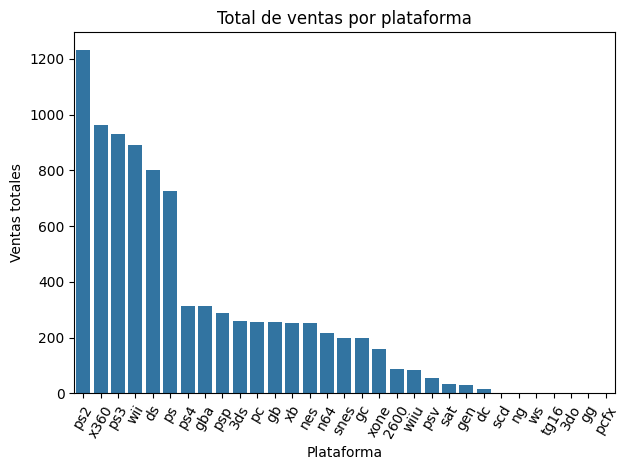

In [18]:
total_sales_per_platform = games_modified.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sns.barplot(total_sales_per_platform)
plt.xticks(rotation=60)
plt.title('Total de ventas por plataforma')
plt.ylabel('Ventas totales')
plt.xlabel('Plataforma')
plt.tight_layout()

**¿Cómo varían las ventas de una plataforma a otra?** 

Observando el gráfico de barras, podemos notar lo siguiente:

*Plataformas TOP:* Unas plataformas destacan claramente con ventas totales  más altas en comparación con el resto. Estas incluyen PS2 como líder, seguida por X360, PS3, Wii,DS, PS, PS4, GBA, PSP y 3DS.
*Descenso gradual:* Después de las principales plataformas(top), hay una tendencia general de disminución gradual de las ventas totales.
*Plataformas con menor venta:* Muchas plataformas tienen ventas totales más bajas.


Elegimos entonces las plataformas con las mayores ventas totales y construimos una distribución basada en los datos de cada año:

Según el gráfico, consideremos las 10 plataformas principales con las mayores ventas totales: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP,3DS. Para comprender su distribución de ventas a lo largo del tiempo, necesitaríamos los datos de ventas reales desglosados por año para cada una de estas plataformas:

### 3.3 Top 10 plataformas respecto ventas totales
Revisamos las 10 plataformas con mayores ventas totales para obtener g´rafico que refleje ventas anuales


In [19]:
top_platforms = total_sales_per_platform.head(10).index
total_sales_per_platform_and_year = games_modified[games_modified['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
display(total_sales_per_platform_and_year)

,platform,year_of_release,total_sales
6,ds,1985,0.02
25,ps,1994,6.03
26,ps,1995,35.96
27,ps,1996,94.70
28,ps,1997,136.17
...,...,...,...
61,ps4,2016,69.25
57,ps3,2016,3.60
5,3ds,2016,15.14
84,wii,2016,0.18


Visualizamos una anomalia, **ds** tiene un dato de ventas totales de 0.2 millones en 1985, pero Nintendo DS fué lanzado en 2004, procedemos a corregir el dato y posteriormente a continuar con el análisis


In [20]:
print(games_modified[(games_modified['year_of_release'] == 1985) & (games_modified['platform'] == 'ds')]['year_of_release'].index)


Index([15957], dtype='int64')


In [21]:
games_modified.loc[15957,'year_of_release']=2005
display(games_modified.loc[15957,'year_of_release'])

np.int64(2005)

Repetimos el análisis, esta vez ya con los datos limpios

In [22]:
total_sales_per_platform = games_modified.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = total_sales_per_platform.head(10).index
display(top_platforms)
ventas_anuales = games_modified[games_modified['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
display(ventas_anuales)

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds'], dtype='object', name='platform')

,platform,year_of_release,total_sales
0,3ds,2011,63.20
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78
...,...,...,...
91,x360,2012,99.74
92,x360,2013,88.58
93,x360,2014,34.74
94,x360,2015,11.96


Con el df con la información corregida hacemos el gráfico de ventas por plataforma y año

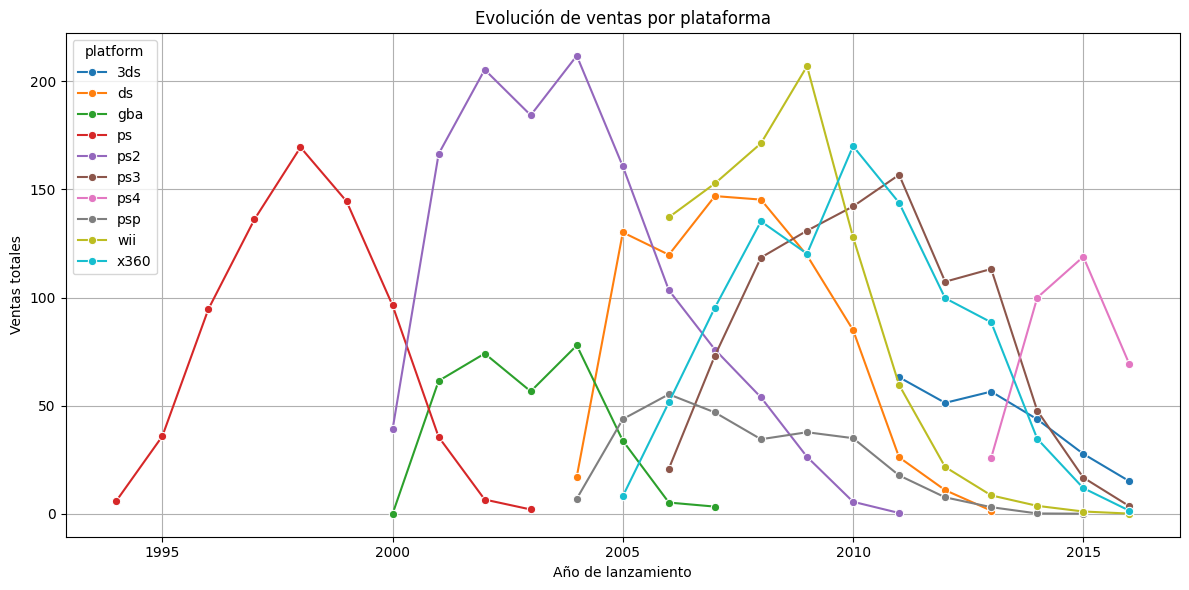

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_anuales, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Evolución de ventas por plataforma')
plt.grid(True)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.tight_layout()
plt.show()

La gráfica de la evolución de ventas por plataforma a lo largo de sus años de lanzamiento muestra el ciclo de vida de las consolas y su contribución a las ventas del año 2016, que tambien es el último año de datos en nuestro dataset. Plataformas como la PlayStation 2 (PS2), a pesar de su lanzamiento anterior, generaron ventas significativas durante una extensa parte del año. La Nintendo Wii también mostró un fuerte impacto en las ventas. PlayStation 3 (PS3) y Xbox 360 (X360) tambien tuvieron buenas ventas.

Durante el 2016, varias plataformas que fueron muy populares en el pasado, como PS2, PSP, Nintendo DS (DS), Game Boy Advance (GBA) y Wii, muestran decremento en sus juegos más recientes. Esto indica el final de su ciclo de vida comercial activo en el contexto de nuestro dataset.

Analizando los años de lanzamiento y las tendencias de venta del 2016, observamos que las nuevas plataformas generalmente tardan unos años después de su lanzamiento en alcanzar ventas significativas. Por otro lado, las plataformas más antiguas tienden a tener un declive en sus ventas aproximadamente entre 5 y 10 años o más después de su lanzamiento y su pico de popularidad, hasta que su contribución a las ventas anuales se vuelve insignificante."

Confirmamos el top de juegos

In [24]:
platform_sales_pivot_table = pd.pivot_table(games_modified, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('total_sales',ascending=False)

display(platform_sales_pivot_table)

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


### 3.4 Vida comercial de una plataforma
Conocer el tiempo promedio de vida de las plataforma

In [25]:
sales_platform = games_modified.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
alllife=[]
for platform in sales_platform.columns:
    lst=(sales_platform.index[~sales_platform[platform].isnull()])
    life =lst.max()-lst.min()+1
    alllife.append(life)
np.mean(alllife)

np.float64(8.0)

La vida útil de una plataforma de juegos es de 8 años. Sobre esta base, podemos dejar el intervalo de tiempo de los últimos 8 años para la previsión.

### 3.5 Determinar período relevante
Tomaremos datos desde 2016 y 8 años para atrás para predecir 2017

In [26]:

games_actual = games_modified[games_modified['year_of_release'] >= 2009]
games_actual_top=games_actual[games_actual['platform'].isin(top_platforms)]

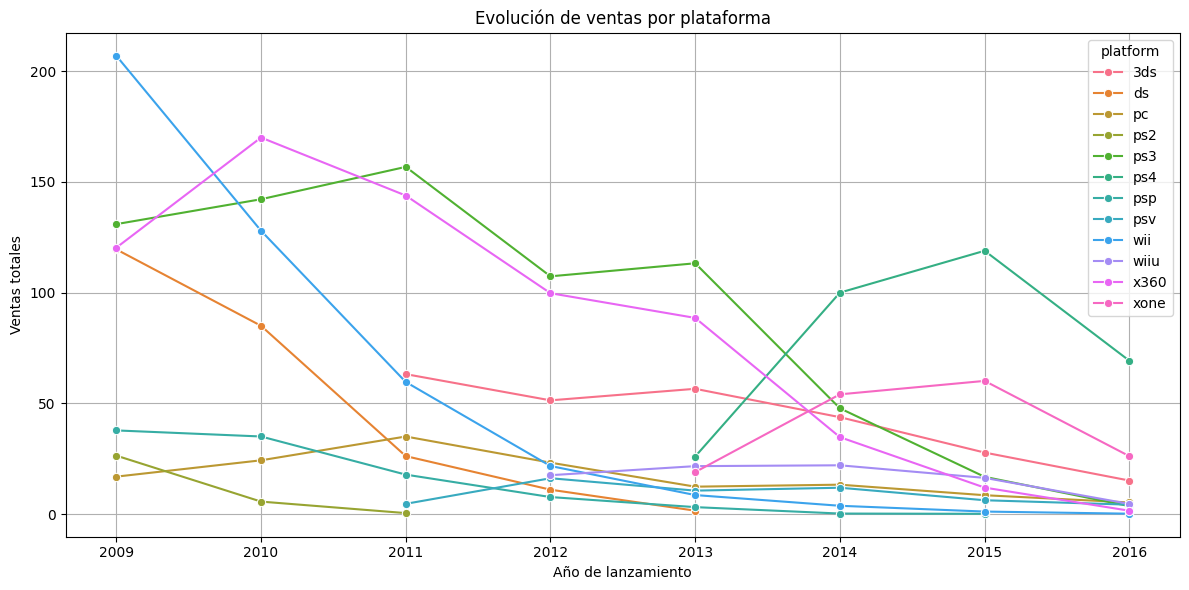

In [27]:
# Evolución anual de ventas por plataforma

ventas_anuales_top = games_actual.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_anuales_top, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Evolución de ventas por plataforma')
plt.grid(True)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.tight_layout()
plt.show()

### 3.6 Distribución de las ventas por platafora
Revisamos como están distribuidas las ventas en cada plataforma

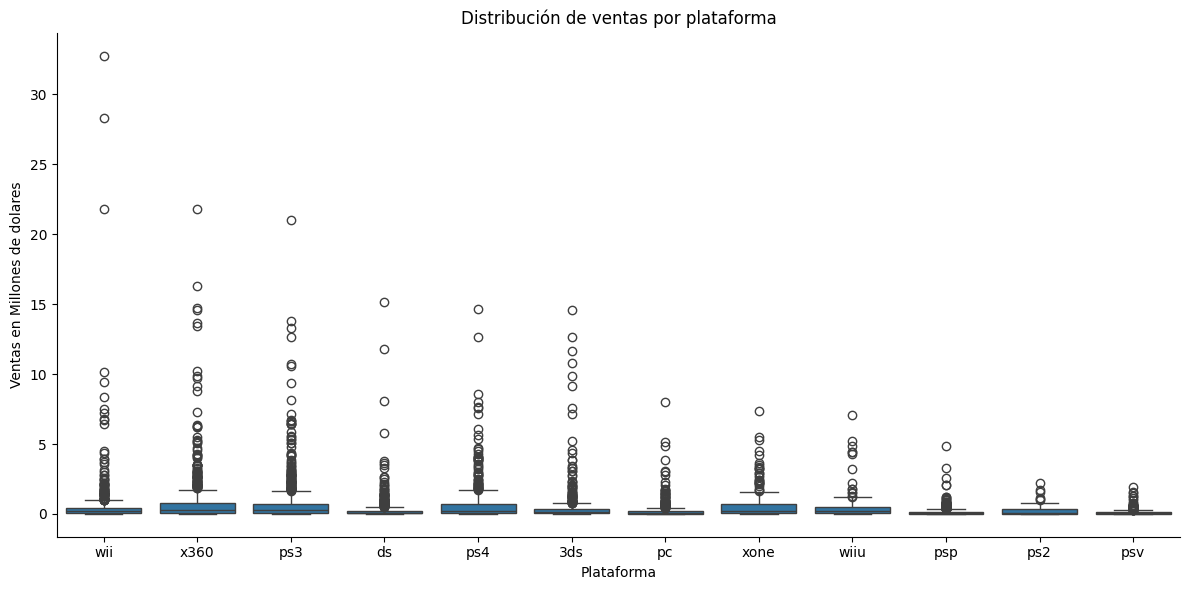

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(games_actual, x='platform', y='total_sales')
#plt.ylim(0, 3)  # Limita el eje y para excluir valores atípicos extremos
plt.title('Distribución de ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de dolares')
sns.despine()
plt.tight_layout()
plt.show()

Dado que el diagrama muestra una distribución 

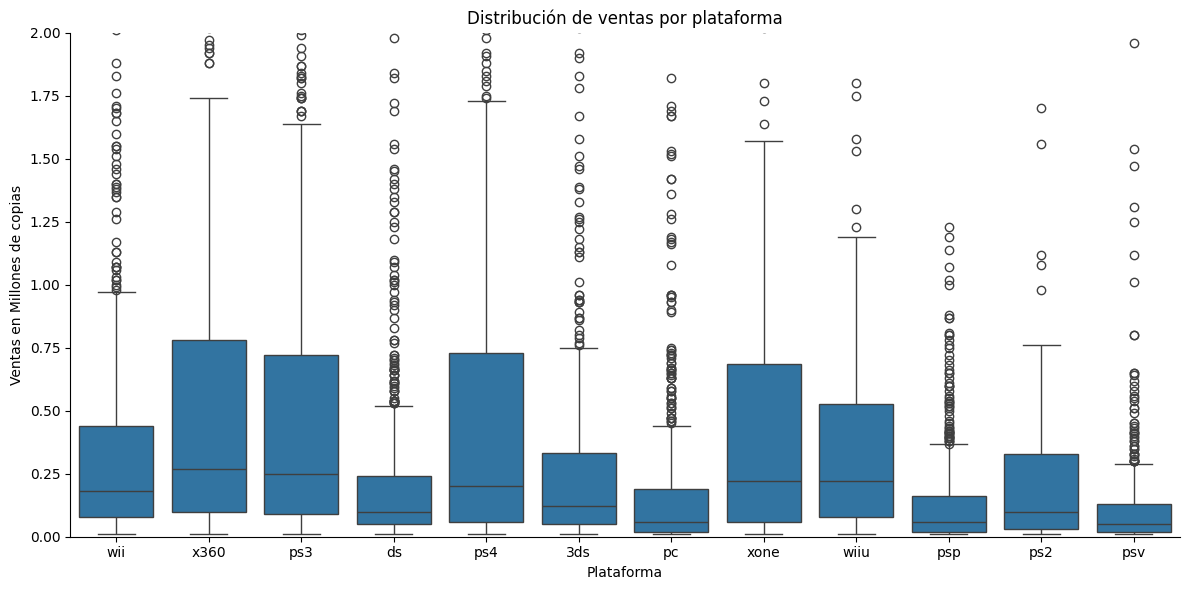

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(games_actual, x='platform', y='total_sales')
plt.ylim(0, 2)  # Limita el eje y para excluir valores atípicos extremos
plt.title('Distribución de ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Millones de copias')
sns.despine()
plt.tight_layout()
plt.show()

En general, las ventas masivas por plataforma no llegan al millón de copias, pero hay juegos populares, proyectos con muchas de ventas.

### 3.7 Cálculo de la correlación entre reseñas y ventas

Tomemos  2 de las plataformas más populares y relevantes PS4 y XOne

In [30]:
ps4_games = games_actual[games_actual['platform'] == 'ps4']
xone_games=games_actual[games_actual['platform']=='xone']
display(ps4_games.sample(2))
display(xone_games.sample(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9499,final fantasy xiv: heavensward,ps4,2015,action,0.0,0.06,0.06,0.01,86.0,7.6,T,0.13
12137,the book of unwritten tales 2,ps4,2015,adventure,0.0,0.06,0.00,0.01,63.0,8.6,unknown,0.07


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13643,brothers: a tale of two sons,xone,2015,adventure,0.03,0.01,0.0,0.00,81.0,8.9,T,0.04
7672,farming simulator 2015,xone,2015,simulation,0.10,0.08,0.0,0.02,NaN,NaN,unknown,0.20


### 3.7.1 Correlación de opiniones de  críticos y ventas

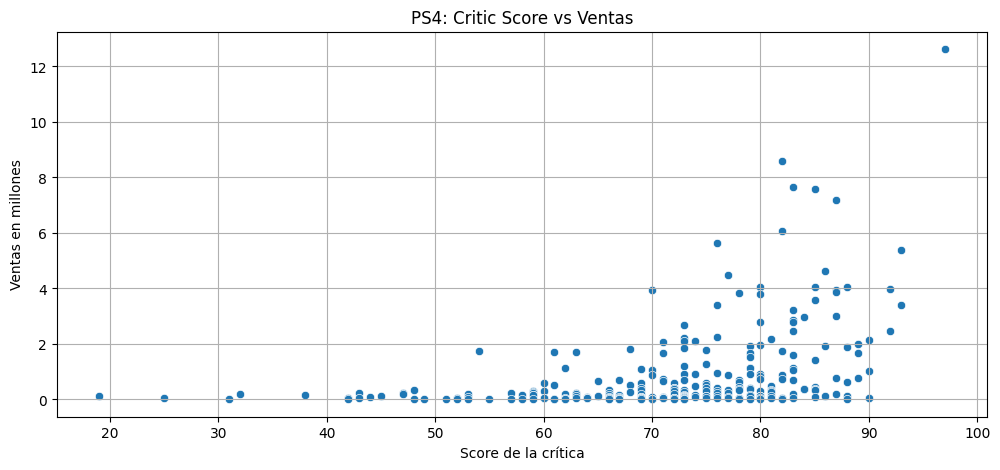

In [31]:
plt.figure(figsize=(12,5))
sns.scatterplot(ps4_games, x='critic_score', y='total_sales')
plt.title('PS4: Critic Score vs Ventas')
plt.xlabel('Score de la crítica')
plt.ylabel('Ventas en millones')
plt.grid(True)
plt.show()

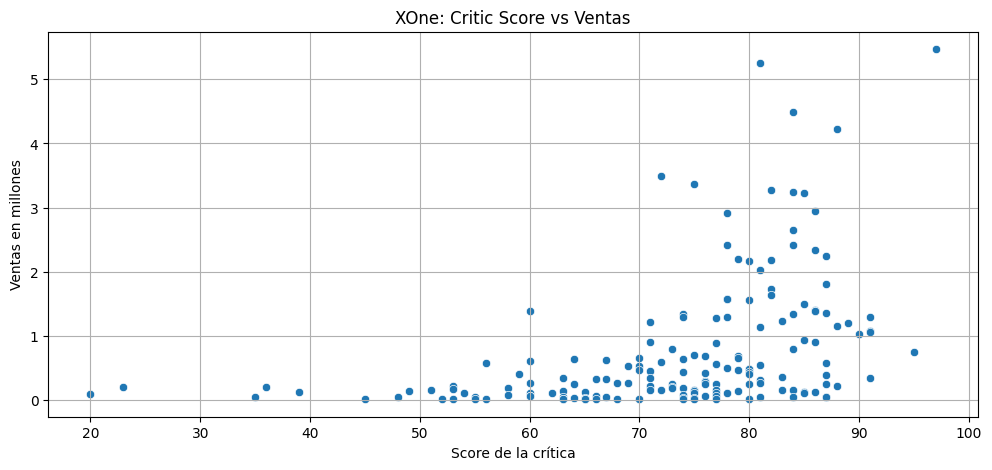

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(xone_games, x='critic_score', y='total_sales')
plt.title('XOne: Critic Score vs Ventas')
plt.xlabel('Score de la crítica')
plt.ylabel('Ventas en millones')
plt.grid(True)
plt.show()

### 3.7.2 Correlación de opiniones de  usuarios y ventas

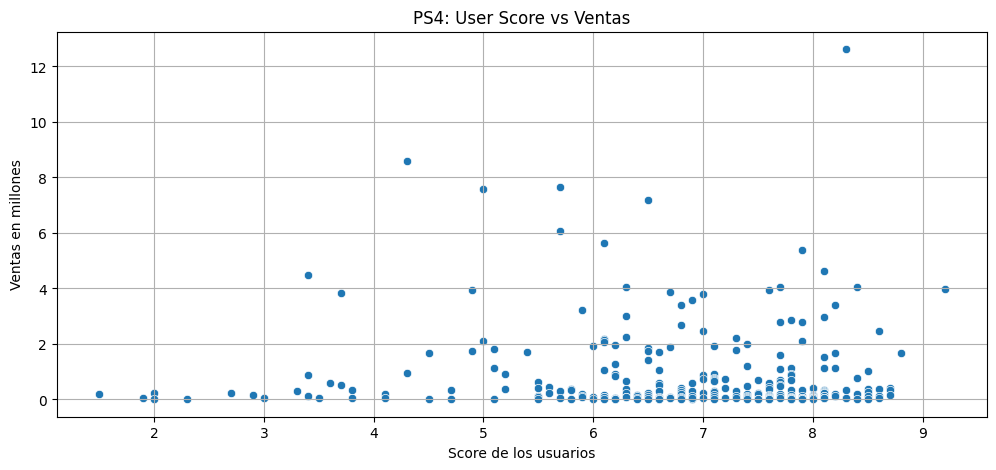

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(ps4_games, x='user_score', y='total_sales')
plt.title('PS4: User Score vs Ventas')
plt.xlabel('Score de los usuarios')
plt.ylabel('Ventas en millones')
plt.grid(True)
plt.show()

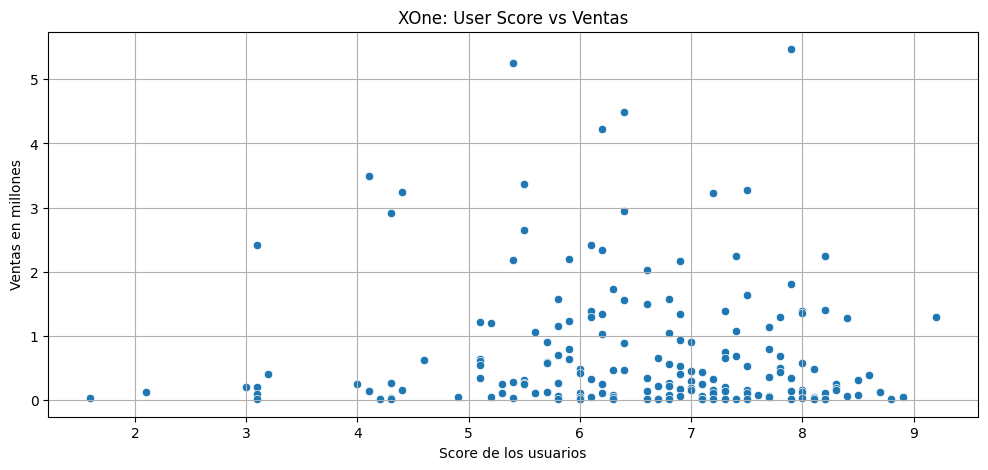

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(xone_games, x='user_score', y='total_sales')
plt.title('XOne: User Score vs Ventas')
plt.xlabel('Score de los usuarios')
plt.ylabel('Ventas en millones')
plt.grid(True)
plt.show()

Al observar las gráficas, queda claro que lo que opinan los usuarios no tiene mucho que ver con cuántas unidades se venden. En cambio, parece haber una pequeña conexión entre lo que dicen los críticos y las ventas. Los juegos que vendieron mucho solían tener buenas notas de la crítica, pero no todos los juegos con buenas notas vendieron mucho. Esto nos hace pensar que la publicidad es clave para vender, aunque a menudo los usuarios terminan decepcionados. Los críticos, por su parte, parecen aprobar casi todo (y últimamente ha habido bastante polémica por esto).

### 3.8 Correlación de opiniones de  críticos y de usarios vs ventas

In [35]:
# Correlaciones PS4
print('Correlación Critic Score vs Ventas:', ps4_games['critic_score'].corr(ps4_games['total_sales']))
print('Correlación User Score vs Ventas:', ps4_games['user_score'].corr(ps4_games['total_sales']))

Correlación Critic Score vs Ventas: 0.4065679020617816
Correlación User Score vs Ventas: -0.03195711020455645


In [36]:
# Correlaciones Xone
print('Correlación Critic Score vs Ventas:', xone_games['critic_score'].corr(xone_games['total_sales']))
print('Correlación User Score vs Ventas:', xone_games['user_score'].corr(xone_games['total_sales']))

Correlación Critic Score vs Ventas: 0.4169983280084017
Correlación User Score vs Ventas: -0.06892505328279416


Existe una mayor correlación de las ventas con las valoraciones de los críticos que con las valoraciones de los usuarios.

### 3.9 Distribución general de juegos por géneros

In [37]:
genre_sales = games_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
genre_sales.columns = ['sum', 'count']
genre_sales.sort_values(by='sum', ascending=False)

,sum,count
genre,,
action,810.78,1767
shooter,549.03,500
sports,465.76,758
role-playing,362.59,671
misc,310.37,782
platform,160.25,182
racing,156.37,321
fighting,113.49,252
simulation,104.67,340


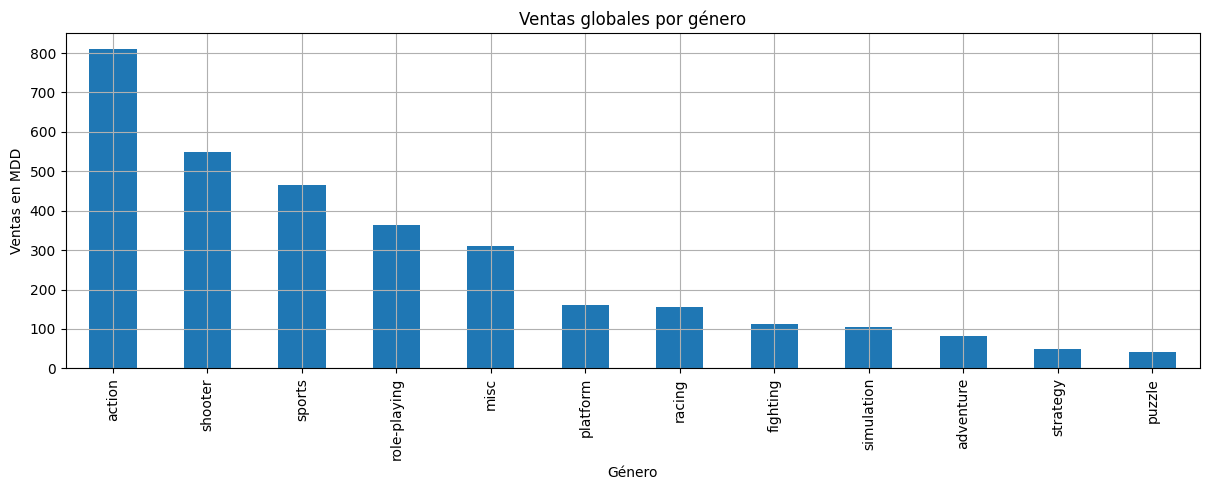

In [38]:
# Ventas por género suma
generos_ventas = games_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
generos_ventas.plot(kind='bar', figsize=(12,5), title='Ventas globales por género')
plt.grid(True)
plt.tight_layout()
plt.xlabel('Género')
plt.ylabel('Ventas en MDD')
plt.show()

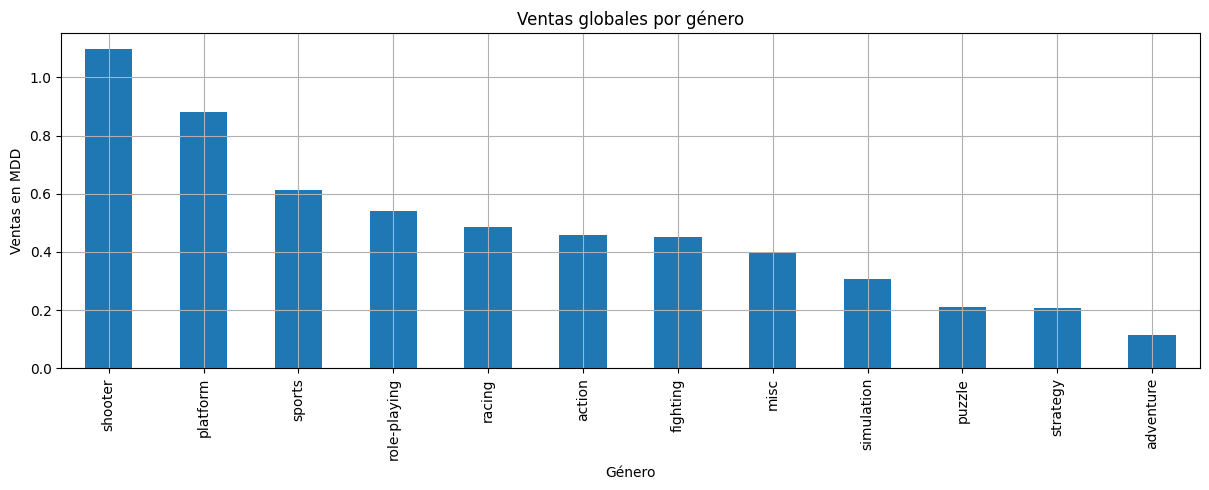

In [39]:
# Ventas por género promedio
generos_ventas = games_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
generos_ventas.plot(kind='bar', figsize=(12,5), title='Ventas globales por género')
plt.grid(True)
plt.tight_layout()
plt.xlabel('Género')
plt.ylabel('Ventas en MDD')
plt.show()

El género de acción es el que encabeza ventas, pues tiene el mayor interés entre los usuarios. Le siguen *Shooter*, *Sports* y *Role-playing*. Géneros menos populares entre los usuarios - *Puzzle*, *Strategy* y *Adventure*

Cabe destacar que el líder de ventas medias es *Shooter*, en el 2º puesto con un gran retraso está *Platform*, *Action* está sólo en la mitad, el género Adventure cierra la lista. En el género Shooter el precio medio de un juego es alto, pero no hay muchos, para el género Acción la situación es diferente - hay muchos juegos, el precio medio de ellos no es alto.

# Paso 4: Crear un retrato del usuario de cada región

### 4.1 Identificar al usuario de cada región (NA, EU, JP):
### 4.1.1 Plataformas más populares (top 5)


<Axes: title={'center': 'Popularidad de las plataformas en Japón'}, xlabel='Plataforma', ylabel='Ventas'>

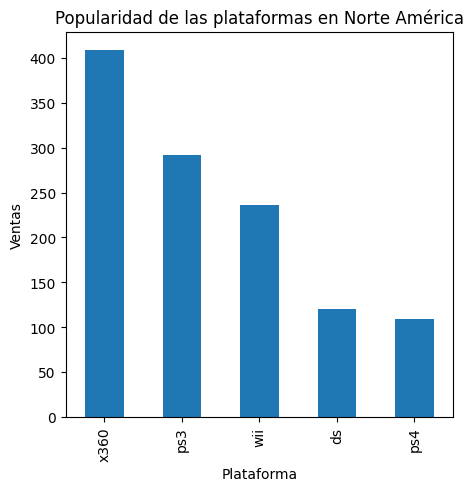

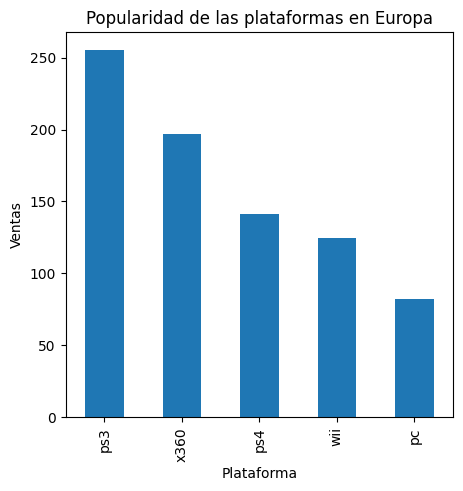

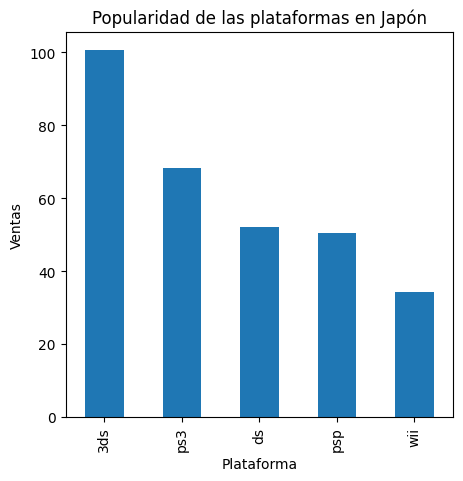

In [40]:

na_sales = games_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.columns = ['sales']
na_sales.plot(kind='bar',y='sales' ,xlabel='Plataforma',ylabel='Ventas', legend=False, title = 'Popularidad de las plataformas en Norte América', figsize=(5, 5))

eu_sales = games_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.columns = ['sales']
eu_sales.plot(kind='bar',y='sales',xlabel='Plataforma',ylabel='Ventas', legend=False, title = 'Popularidad de las plataformas en Europa', figsize=(5, 5))

jp_sales = games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.columns = ['sales']
jp_sales.plot(kind='bar',y='sales',xlabel='Plataforma',ylabel='Ventas', legend=False, title = 'Popularidad de las plataformas en Japón', figsize=(5, 5))

Puede observarse que cada región tiene sus propias plataformas favoritas en cuanto a ventas de juegos entre plataformas. Xbox 360 para Norte América, Play Station 3 para Europa y Nintendo DS 3 para Japón.

En general, la plataforma PS3 se sitúa entre las más populares del mundo. En Europa y Norte América. las plataformas se distribuyen de forma similar.

Los juegos de PC son fuertes en Europa, mientras que la Wii tiene mucha demanda en Norte América. En Japón, las consolas portátiles son populares.

### 4.1.2 Géneros más populares (top 5)

<Axes: title={'center': 'Popularidad por géneros en Japón'}, xlabel='Plataforma', ylabel='Ventas'>

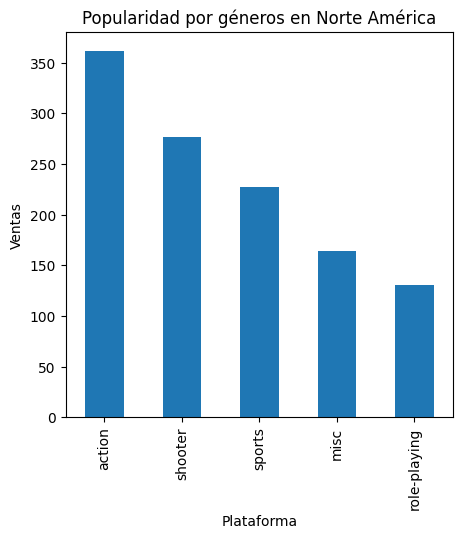

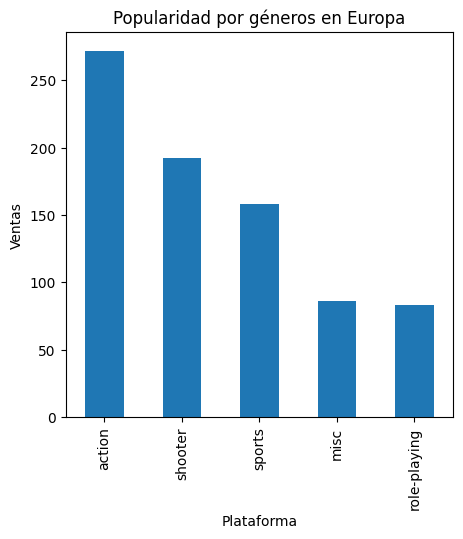

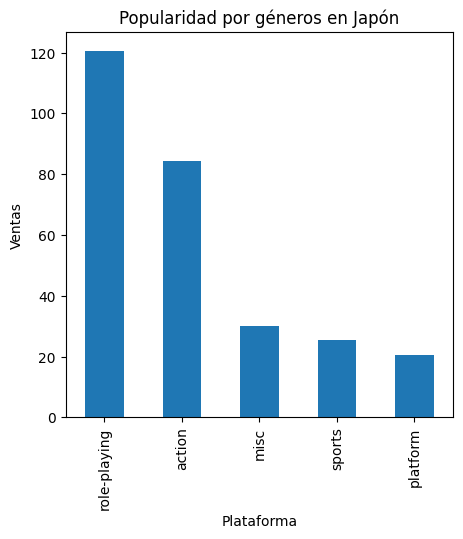

In [41]:

na_genres = games_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_genres.columns = ['sales']
na_genres.plot(kind='bar',y='sales',xlabel='Plataforma',ylabel='Ventas', legend=False, title = 'Popularidad por géneros en Norte América', figsize=(5, 5))

eu_genres = games_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genres.columns = ['sales']
eu_genres.plot(kind='bar',y='sales',xlabel='Plataforma',ylabel='Ventas', legend=False, title = 'Popularidad por géneros en Europa', figsize=(5, 5))

jp_genres = games_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_genres.columns = ['sales']
jp_genres.plot(kind='bar',y='sales',xlabel='Plataforma',ylabel='Ventas', legend=False, title = 'Popularidad por géneros en Japón', figsize=(5, 5))

El género de acción es el más popular en los 3 espacios.

En general, la distribución de géneros en Norte América y Europa no difiere mucho.

En Japón, los shooters son menos populares que los juegos de rol.

### 4.2 Afectación de la clasificación ESRB en las ventas

<Axes: title={'center': 'Dependencia de las ventas  de juegos respecto a su clasificación en Japón'}, xlabel='Rating', ylabel='Ventas (MDD)'>

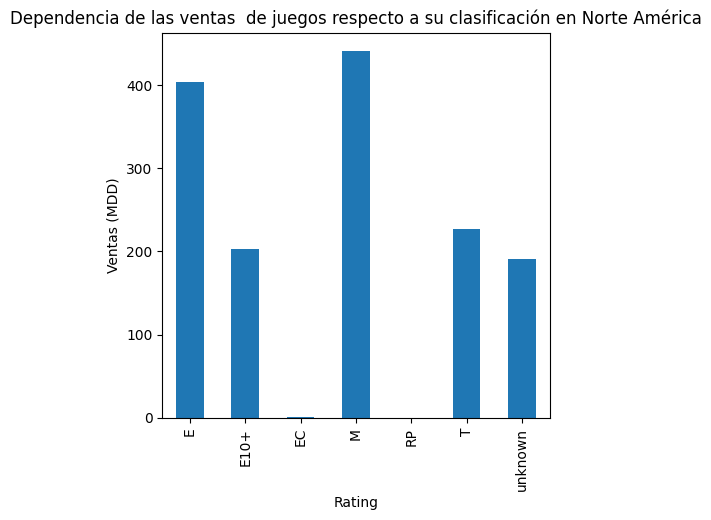

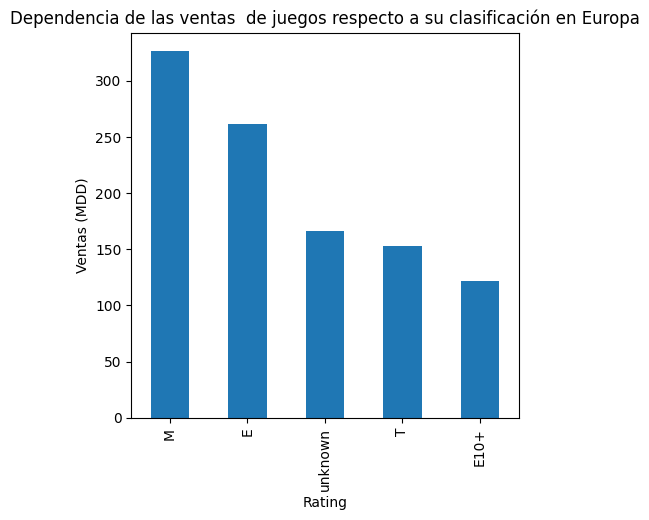

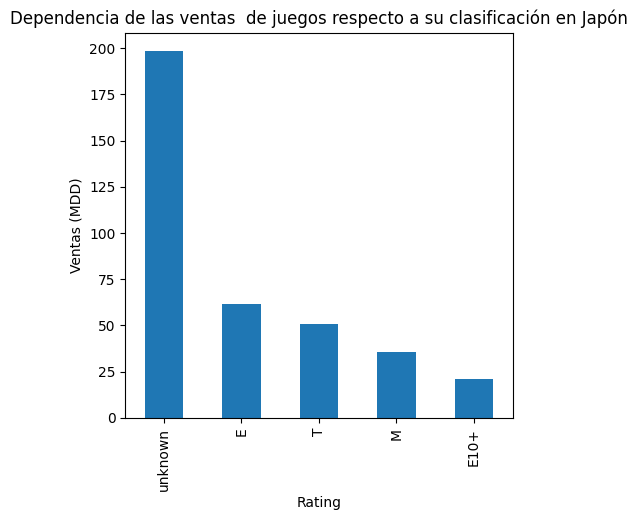

In [42]:
na_rating = games_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.columns = ['sales']
na_rating.plot(kind='bar',y="sales",xlabel='Rating',ylabel='Ventas (MDD)', legend=False, title = 'Dependencia de las ventas  de juegos respecto a su clasificación en Norte América', figsize=(5, 5))

eu_ratings = games_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_ratings.columns = ['sales']
eu_ratings.plot(kind='bar',y="sales",xlabel='Rating',ylabel='Ventas (MDD)', legend=False, title = 'Dependencia de las ventas  de juegos respecto a su clasificación en Europa', figsize=(5, 5))

jp_rating = games_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_rating.columns = ['sales']
jp_rating.plot(kind='bar',y="sales",xlabel='Rating',ylabel='Ventas (MDD)', legend=False, title = 'Dependencia de las ventas  de juegos respecto a su clasificación en Japón', figsize=(5, 5))

Los juegos de acción y shooters obtienen clasificación para adultos, lo que puede explicar las elevadas ventas de juegos clasificados para adultos en EE.UU. y Europa.

Los juegos para adolescentes son menos populares, ya que están limitados en muchos aspectos. Y los adolescentes pueden comprar con seguridad juegos con restricciones para adultos.

La alta demanda de la clasificación T en el mercado japonés puede estar relacionada con la popularidad del anime.

# Paso 5. Prueba las siguientes hipótesis

### Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Formulación de las hipótesis nula y alternativa:

**Hipótesis Nula (H0):** La calificación promedio de los usuarios para la plataforma Xbox One es igual a la calificación promedio de los usuarios para la plataforma PC.

**Hipótesis Alternativa (H1):** La calificación promedio de los usuarios para la plataforma Xbox One es diferente de la calificación promedio de los usuarios para la plataforma PC.

Utilizaremos una prueba t de Student para muestras independientes.


In [51]:
xbox_one_scores = games_actual[games_actual['platform'] == 'xone']['user_score'].dropna()
pc_scores = games_actual[games_actual['platform'] == 'pc']['user_score'].dropna()
alpha=0.05

var_xone = np.var(xbox_one_scores, ddof=1)
var_pc = np.var(pc_scores, ddof=1)
print(f"Varianza de las calificaciones de Xbox One: {var_xone}")
print(f"Varianza de las calificaciones de PC: {var_pc}")

stat_L, p_L = st.levene(xbox_one_scores, pc_scores)
print(f"Valor p de Levene: {p_L}")

if p_L > alpha:
    equal_variance = True
    print("Las varianzas parecen ser iguales (p > alfa), se usará equal_var=True en la prueba t.")
else:
    equal_variance = False
    print("Las varianzas parecen ser diferentes (p <= alfa), se usará equal_var=False en la prueba t.")

stat, p = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_variance)
print(f"Valor p de la prueba t: {p}")

if p < alpha:
    print("Rechazamos la H0: hay diferencia significativa entre las calificaciones promedio")
else:
    print("No se rechaza la H0: no hay diferencia significativa")

Varianza de las calificaciones de Xbox One: 1.9069968429360695
Varianza de las calificaciones de PC: 2.4102204499213022
Valor p de Levene: 0.055409627600990684
Las varianzas parecen ser iguales (p > alfa), se usará equal_var=True en la prueba t.
Valor p de la prueba t: 0.32258313313994913
No se rechaza la H0: no hay diferencia significativa


### Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Formulación de las hipótesis nula y alternativa:

**Hipótesis Nula (H0):** La calificación promedio de los usuarios para el género Acción es igual a la calificación promedio de los usuarios para el género Deportes.
 
**Hipótesis Alternativa (H1):** La calificación promedio de los usuarios para el género Acción es diferente de la calificación promedio de los usuarios para el género Deportes.
 
Utilizaremos una prueba t de Student para muestras independientes.

In [52]:
action_scores = games_actual[games_actual['genre'] == 'action']['user_score'].dropna()
sports_scores = games_actual[games_actual['genre'] == 'sports']['user_score'].dropna()

var_action = np.var(action_scores, ddof=1)  
var_sports = np.var(sports_scores, ddof=1)
print(f"Varianza de las calificaciones de Acción: {var_action}")
print(f"Varianza de las calificaciones de Deportes: {var_sports}")

stat_L, p_L = st.levene(action_scores, sports_scores)
print(f"Valor p de Levene: {p_L}")

if levene_p_value > alpha:
    equal_variance = True
    print("Las varianzas parecen ser iguales (p > alfa), se usará equal_var=True en la prueba t.")
else:
    equal_variance = False
    print("Las varianzas parecen ser diferentes (p <= alfa), se usará equal_var=False en la prueba t.")

stat, p = st.ttest_ind(action_scores, sports_scores, equal_var=equal_variance)
print(f"Valor p de la prueba t: {p}")

if p < alpha:
    print("Rechazamos la H0: hay diferencia significativa entre los géneros")
else:
    print("No se rechaza la H0: no hay diferencia significativa")

Varianza de las calificaciones de Acción: 1.845225821564057
Varianza de las calificaciones de Deportes: 2.883255576441103
Valor p de Levene: 1.6883340005511125e-07
Las varianzas parecen ser iguales (p > alfa), se usará equal_var=True en la prueba t.
Valor p de la prueba t: 1.0516734948473802e-15
Rechazamos la H0: hay diferencia significativa entre los géneros


# Paso 6. Conclusión general

Una campaña para 2017, debería incluir a las plataformas  PS4 y XBox One, ya que estan en su rango de vida, no siendo el caso de xbox 360. Los juegos promocionados deberán ser del género Acción o Shooter.

Si el objetivo es el mercado japonés, hay que centrarse en las consolas portátiles.

Es recomendable vender juegos con calificación M y no tanto en los juegos para adolescentes.

Las reseñas de los usuarios se generan tras la adquisición del juego, ejerciendo una influencia indirecta y limitada en las ventas. Caso contrario, las valoraciones de los críticos suelen tener un impacto ligeramente superior, ya que normalmente evalúan los juegos antes de su lanzamiento y pueden impactar la opinión pública. Es notable la disparidad que a veces se presenta entre las apreciaciones de los críticos y las experiencias de los jugadores.